# Feature extraction with RBM

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv('../data/ML/E0_ML_n3_part1.csv')
data.head()

,h_nb_victories,h_nb_draws,h_nb_defeats,h_nb_points,h_nb_goals_scored,h_nb_goals_conceded,h_nb_goals_diff,h_nb_games,h_nb_games_home,h_nb_victories_home,...,diff_nb_defeats,diff_nb_points,diff_nb_goals_diff,diff_season_wages,Month,Week,distance_km,capacity_home_stadium,home_win,id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,41.0,8,33,7839.955337,42785.0,0,E0_2009_2010_0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-85.5,8,33,2384.244176,31154.0,0,E0_2009_2010_1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-8.1,8,33,8738.109400,28100.0,0,E0_2009_2010_2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,136.4,8,33,14384.656594,42449.0,1,E0_2009_2010_3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-56.3,8,33,8491.070855,40157.0,0,E0_2009_2010_4


In [22]:
LABEL = 'home_win'
y=data[LABEL].values
X=data.drop([LABEL,'id','Month','Week'],1).values
features=data.drop([LABEL,'id','Month','Week'],1).columns.values

In [23]:
# normalisation -> [0,1]
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import BernoulliRBM

mm_scaler = MinMaxScaler(feature_range=(0,1))
X_mm = mm_scaler.fit_transform(X)

rbm = BernoulliRBM()
rbm.fit(X_mm)
print(rbm.intercept_hidden_)
print(rbm.intercept_visible_)
print(rbm.components_)

[-1.52891325 -1.49410883 -1.50115917 -1.47801004 -1.49907038 -1.47358434
 -1.56302233 -1.48074533 -1.50970815 -1.51355513 -1.56766197 -1.49680051
 -1.50607725 -1.55214792 -1.49435862 -1.5230893  -1.50069379 -1.5504861
 -1.56477551 -1.48214954 -1.52803645 -1.45704164 -1.51388465 -1.52199538
 -1.49026392 -1.51648549 -1.49589773 -1.4769253  -1.4746109  -1.50081407
 -1.51329773 -1.54487728 -1.55645181 -1.52800469 -1.48850215 -1.48929518
 -1.48371798 -1.50569794 -1.53074495 -1.489434   -1.4625243  -1.51369651
 -1.4887399  -1.52087782 -1.5270818  -1.47463975 -1.51784922 -1.48500657
 -1.4642589  -1.46207219 -1.45498503 -1.4686574  -1.49727058 -1.50910043
 -1.46525777 -1.50714163 -1.45062317 -1.47720025 -1.45888201 -1.48269827
 -1.48463363 -1.54715835 -1.53369103 -1.51836116 -1.48572381 -1.51861082
 -1.50609849 -1.52726302 -1.4865523  -1.51076748 -1.44339544 -1.502852
 -1.4305741  -1.53047328 -1.52516324 -1.47901065 -1.54810767 -1.4779425
 -1.48151252 -1.49028547 -1.503147   -1.50110546 -1.536

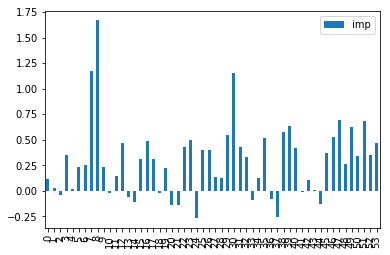

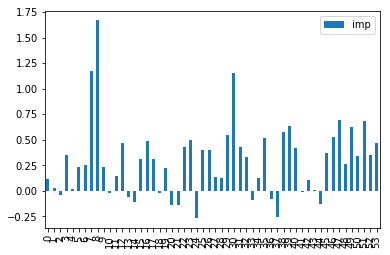

In [26]:
feat_imp = {'features':features, 'imp':rbm.intercept_visible_} 
feat_imp_df=pd.DataFrame(feat_imp)

feat_imp_df.plot(kind='bar',)
plt.show()